In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image =cv2.imread('road.jpg')
h,w = image.shape[:2]
print(f"The height is {h}\nThe width is {w}")

In [ ]:
roi = image[100 : 500, 200 : 700]
cv2.imshow("ROI", roi)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
ratio = 800/w
print(f"The ratio is {ratio}")
dim =(800, int(h*ratio))
print(dim)
# Resizing the image
resized_aspect =cv2.resize(image,dim)
cv2.imshow("Resized Aspect", resized_aspect)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
output = image.copy()
h,w =output.shape[:2]
print(f"The height is {h}\nThe width is {w}")
rectangle= cv2.rectangle(output,(0,0),(100,100) ,(0,255,0), 20) # Gree Line  Color
rectangle= cv2.rectangle(output,(w-100,0),(w,h) ,(255,0,0), 1) # Gree Line  Color
cv2.imshow("Rectangle", rectangle)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

# ✅ Enregistrer l’image modifiée
cv2.imwrite("Rectangle.jpg", rectangle)

In [ ]:
output = image.copy()
message= "This IS A Red Box"
texted_image = cv2.putText(output,message ,(w//2 -200,h//2 - 50),fontFace=cv2.FORMATTER_FMT_PYTHON,fontScale=1,color=(0,0,255),thickness=2)
texted_image =cv2.rectangle(texted_image ,(w//2-200,h//2 -100),(w//2+200,h//2 ),(0,0,255),3)
cv2.imshow("Output With Text", output)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
output_BGR = image.copy()
h,w =output.shape[:2]

output_RGB = cv2.cvtColor(output_BGR,cv2.COLOR_BGR2RGB)
cv2.imshow("output_RGB", output_RGB)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
output_gray = cv2.cvtColor(output_RGB,cv2.COLOR_RGB2GRAY)
cv2.imshow("output_gray", output_gray)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
RGB = cv2.imread('RGB.png')
B , G , R = cv2.split(RGB)

cv2.imshow("All", RGB)
cv2.waitKey(0)

cv2.imshow('Blue',B)
cv2.waitKey(0)

In [ ]:
House = cv2.imread('House.jpg')
Galaxy = cv2.imread('Galaxy.jpg')
Sum = cv2.subtract(House,Galaxy)

cv2.imshow("Sum", Sum)
cv2.waitKey(0)

In [ ]:
weightedSum = cv2.addWeighted(House,0.5,Galaxy,0.5,20)
cv2.imshow("weightedSum", weightedSum)
cv2.waitKey(0)

In [ ]:
resize = cv2.resize(Galaxy,(0,0) ,fx=0.5,fy=0.5 ,interpolation=cv2.INTER_NEAREST)
print(f"The Original Size is {Galaxy.shape}\nThe Resized Size is {resize.shape}")

plt.subplot(1,2,1)
plt.title(f"Original : {Galaxy.shape}")
plt.imshow(Galaxy)
# Second Plot
plt.subplot(1,2,2)
plt.title(f"Resized :{resize.shape} ")
plt.imshow(cv2.cvtColor(resize , cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
kernel = np.ones((5,5),np.uint8)
plt.figure(figsize=(15,15))
for i in range(10):
    erodedGal = cv2.erode(cv2.cvtColor(House, cv2.COLOR_BGR2RGB),kernel,iterations= i)
    plt.subplot(5,2,i+1)
    plt.imshow(erodedGal)
    plt.title(f"Iteration {i+1}")

### Bluring Images 

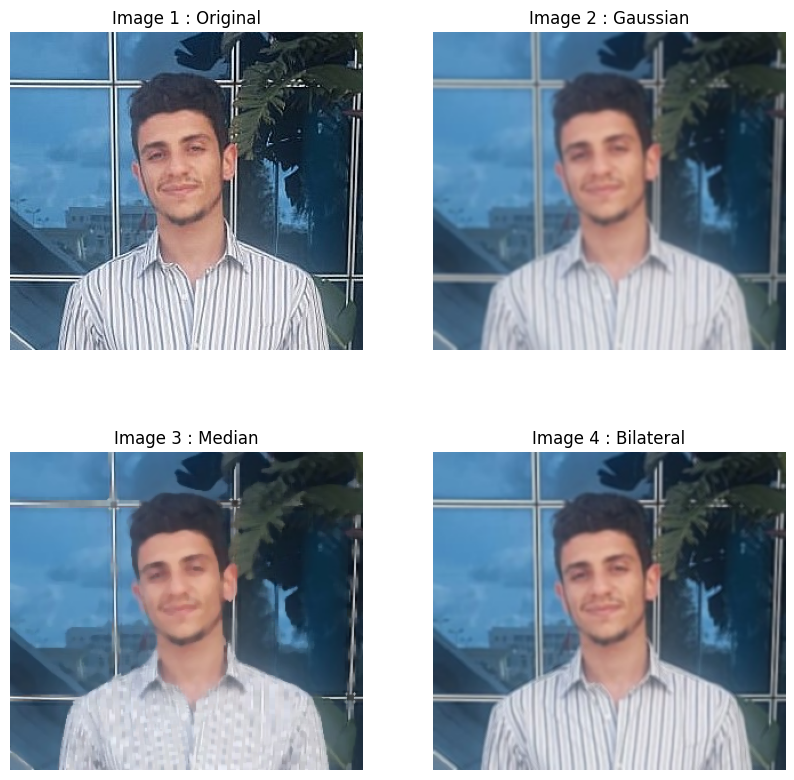

In [3]:
hedi = cv2.imread("mee++.jpg")
hediBlurredGaussian =cv2.GaussianBlur(hedi,(7,7),0)
heiBluuedMedian = cv2.medianBlur(hedi,5)
hediBlurredBilateral = cv2.bilateralFilter(hedi,5,sigmaColor=750,sigmaSpace=1000)

lst = [{"Original" : hedi },{ "Gaussian" :hediBlurredGaussian },{"Median" :heiBluuedMedian  },{"Bilateral" : hediBlurredBilateral }]
plt.figure(figsize=(10,10))
for i in range(len(lst)):
    plt.subplot(2,2,i+1)
    title = list(lst[i].keys())[0]
    plt.imshow(cv2.cvtColor(lst[i][title] , cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} : {title}")
    plt.axis("off")

### Create Border Aroun Images 

In [55]:
replicateHedi = cv2.copyMakeBorder(hedi,h//2,h//2,w//2,w//2,borderType=cv2.BORDER_REPLICATE)

cv2.imshow("replicateHedi", replicateHedi)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

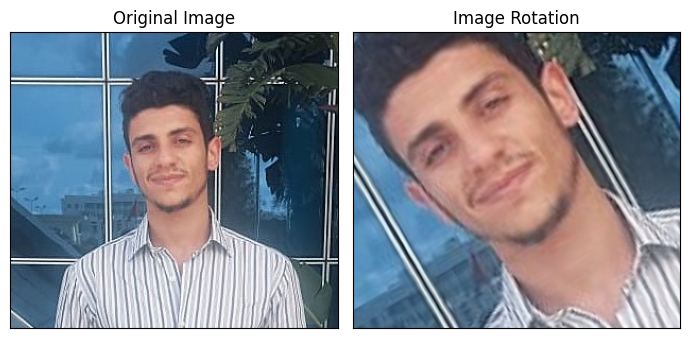

In [72]:
img =hedi
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 2
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

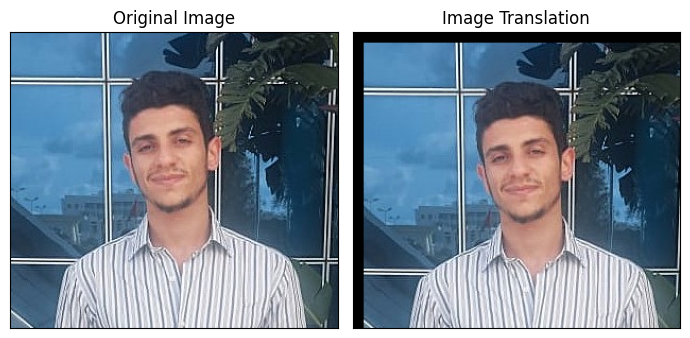

In [ ]:
img =hedi
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

tx, ty = 10, 10
#La matrice doit être en float32
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(translated_image), axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

### Normalization 

hedi shape : (279, 309, 3)
Blue : (279, 309)
Green : (279, 309)
Red : (279, 309)


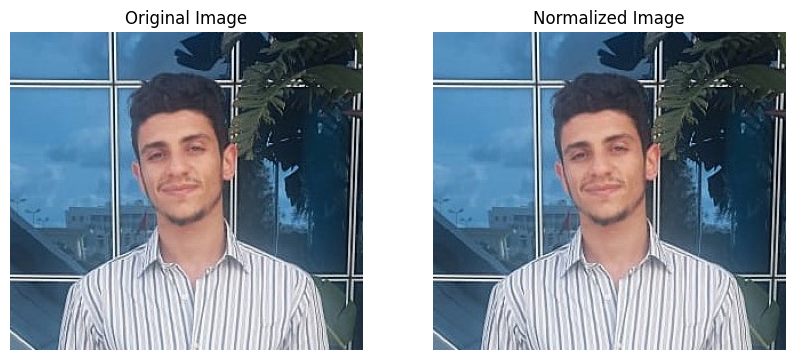

In [9]:
image = hedi
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)
print(f"hedi shape : {image_rgb.shape}\nBlue : {b.shape}\nGreen : {g.shape}\nRed : {r.shape}")
b_normalized = cv2.normalize(b.astype('float'),None ,0,1,cv2.NORM_MINMAX)
g_normalized = cv2.normalize(g.astype('float'),None ,0,1,cv2.NORM_MINMAX)
r_normalized = cv2.normalize(r.astype('float'),None ,0,1,cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis("off")
plt.show()

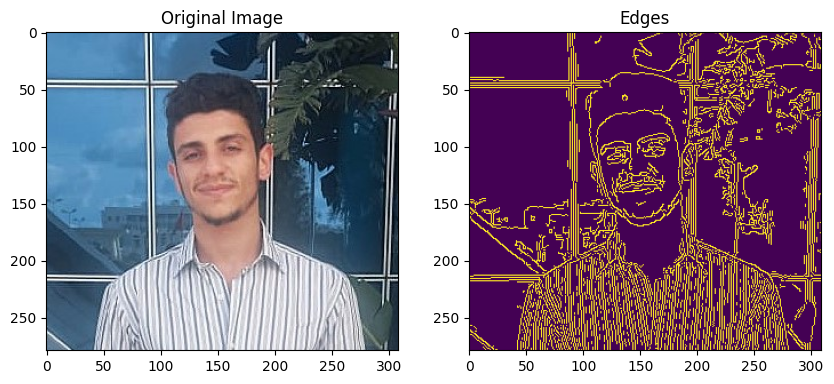

In [34]:
img =hedi
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


median = np.median(image)
lower = int(max(0, 0.66 * median))
upper = int(min(255, 1.33 * median))
edges = cv2.Canny(image_rgb, lower, upper)

fig , ax = plt.subplots(1,2,figsize=(10,5)) 

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(edges)
ax[1].set_title("Edges")
plt.show()

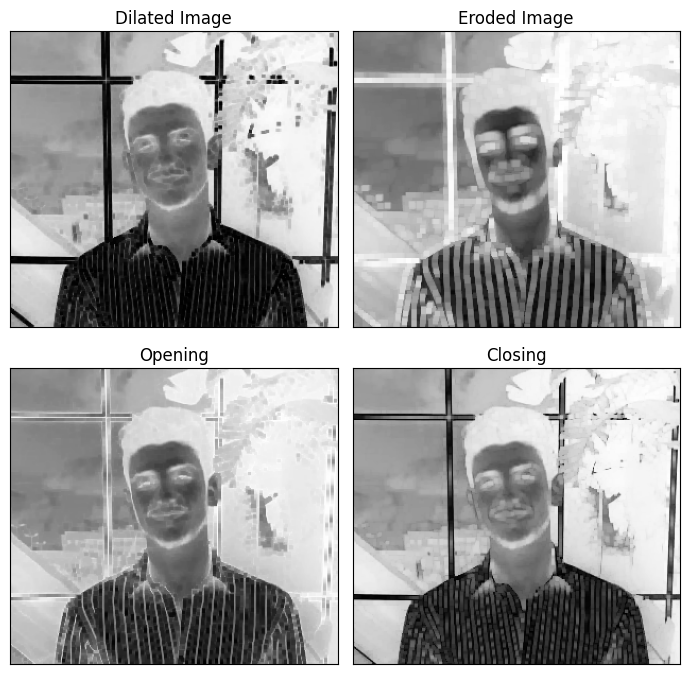

In [42]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=1)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

### Play A video 

In [15]:
import cv2 
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    sucess , frame = cap.read()
    if sucess : 
        cv2.imshow("Video Capture Frame" ,frame)
        key = cv2.waitKey(1)
        print(key)
        if key & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        
    else :
        break
# When everything done, release the video capture object
cap.release()

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
113


In [4]:
import cv2
capSpoofing = cv2.VideoCapture("Spoofing.mp4")
while(capSpoofing.isOpened()) :
    success , frame = capSpoofing.read()
    if success :
        cv2.imshow("Video Capture Frame" ,frame)
        key = cv2.waitKey(10)
        print(key)
        if key & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    else :
        cv2.destroyAllWindows()
        break

capSpoofing.release()  


-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
113


### Creating Video From Images 

In [2]:
from PIL import Image

images = ["Galaxy.jpg","House.jpg","Road.jpg","mee++.jpg"]
mean_height = 0
mean_width = 0
for image in images :
    im = Image.open(image)
    width ,height = im.size
    mean_height += height
    mean_width += width
# Averaging width and height
mean_width = int(mean_width / len(images))
mean_height = int(mean_height / len(images))
print(f"The mean height is {mean_width}\nThe mean width is {mean_height}")

# Resizing all images to the mean width and height
for image in images :
    im = Image.open(image)
    im_resized = im.resize((mean_width,mean_height),Image.LANCZOS)
    im_resized.save(f"Resized_{image}", "JPEG" , quality = 95)
    print(f"Resized {image}")
    

The mean height is 602
The mean width is 378
Resized Galaxy.jpg
Resized House.jpg
Resized Road.jpg
Resized mee++.jpg


In [29]:
import cv2
import os

def generate_video():
    image_folder = "./"  # 📌 Dossier contenant tes images (modifie si besoin)
    video_name = 'mygeneratedvideo.avi'

    # 📸 Liste des images utilisées dans la vidéo
    images = ["Galaxy.jpg", "House.jpg", "Road.jpg", "mee++.jpg"]
    print("Images:", images)

    # 🔁 Vérifie que toutes les images existent
    valid_images = []
    for img in images:
        img_path = os.path.join(image_folder, img)
        if os.path.isfile(img_path):
            valid_images.append(img)
        else:
            print(f"⚠️ Image non trouvée : {img}")
    print(f"valid_images : {valid_images} ")

    if not valid_images:
        print("❌ Aucune image valide trouvée.")
        return

    # 🔍 Lire la première image pour obtenir la taille (width, height)
    first_frame = cv2.imread(os.path.join(image_folder, valid_images[0]))
    height, width, _ = first_frame.shape

    # 🎥 Initialiser le writer vidéo
    fourcc = cv2.VideoWriter_fourcc(*"DIVX")
    video = cv2.VideoWriter(
        video_name,
        fourcc,  # Codec
        1,                                # FPS
        (width, height)                   # Dimensions
    )

    # 📥 Ajouter chaque image au fichier vidéo
    for image in valid_images:
        img_path = os.path.join(image_folder, image)
        frame = cv2.imread(img_path)
        video.write(frame)

    # ✅ Terminer proprement
    video.release()
    cv2.destroyAllWindows()
    print("✅ Vidéo générée avec succès :", video_name)

generate_video()

Images: ['Galaxy.jpg', 'House.jpg', 'Road.jpg', 'mee++.jpg']
valid_images : ['Galaxy.jpg', 'House.jpg', 'Road.jpg', 'mee++.jpg'] 
1482049860
✅ Vidéo générée avec succès : mygeneratedvideo.avi


### Seee the generated videeo

In [ ]:
cap = cv2.VideoCapture("mygeneratedvideo.avi")


while True :
    sucess , frame = cap.read()
    if not sucess :
        print("End of video")
        cv2.destroyAllWindows()
        break 
    cv2.imshow("Video Capture Frame" ,frame)
    key = cv2.waitKey(1000)
    if key & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()
cv2.destroyAllWindows()


### Settinggs of the webcam

In [4]:
import cv2
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(10, 100)

while True :
    success ,frame =cap.read()
    if not success :
        print("End of video")
        cv2.destroyAllWindows()
        break
    cv2.imshow("Video Capture Frame" ,frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()

In [5]:
cv2.imshow("Video Capture Frame" ,cv2.resize(frame,(500,100))) # W-> H
cv2.waitKey(0)

-1

### Sobel Gradient ...

In [31]:
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)

while True :
    success ,frame =cap.read()

    if not success :
        print("Impossible de Lire la frame")
        cv2.destroyAllWindows()
        break

    # Calculation of Sobelx
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    
    # Calculation of Sobely
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    # Calculation of Laplacian
    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    cv2.imshow('laplacian',laplacian)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Basic Manipulation

In [1]:
import numpy as np
import cv2

imgArr = np.zeros((700, 700, 3), np.uint8)
imgArr = cv2.arrowedLine(imgArr,(0,0),(imgArr.shape[1],imgArr.shape[0]),(255,255,255),5,tipLength=0.01)

cv2.imshow("image", imgArr)
cv2.waitKey(0)


-1

In [42]:
img = cv2.imread("Galaxy.jpg")
cv2.circle(img,(img.shape[1]//2,img.shape[0]//2),100,(255,255,0),-1) # Filled Cercle thikcness =-1

cv2.putText(img,"Thsi iS Circle" ,(img.shape[1]//2 -100,img.shape[0]//2-100),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2) # (w,h)
cv2.imshow("image", img)
cv2.waitKey(0)

-1

### Warp Perspective

In [63]:
img = cv2.imread("cards.jpg")

width, height= 450 ,250

pts1 = np.float32([[40,294],[251,92],[235,281],[435,161]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]]) # dst: MatLike =
matrix = cv2.getPerspectiveTransform(pts1,pts2)

imgOutput =cv2.warpPerspective(img,matrix,(width,height))
print(imgOutput.shape)

cv2.imshow("Cardssss", imgOutput)
cv2.imshow(" ONNE Card", img)
cv2.waitKey(0)


[[-1.00843663e-01 -1.51265494e+00  4.48754298e+02]
 [ 3.50050068e-01  3.65646358e-01 -1.21502032e+02]
 [-7.12607494e-04 -2.05876084e-03  1.00000000e+00]]
(250, 450, 3)


-1

### Color Detetction 

`Hiding Face = White Face (Mask) AND original Face`

In [86]:
import cv2
import numpy as np


def empty(a):
    pass

width , height = 640 , 480
img =cv2.imread("./images/mee++.jpg")
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)


# ✅ Créer d'abord une fenêtre nommée
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",width,height)

## ✅ Ajouter la trackbar à la fenêtre 
cv2.createTrackbar("Hue Min","TrackBars",12,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",168,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",0,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",255,255,empty)
cv2.createTrackbar("Val Min","TrackBars",0,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)
while True :

    
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min,h_max,s_min,s_max,v_min,v_max)

    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)

    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)

    cv2.imshow("Mask", mask)
    cv2.imshow("Result", imgResult)
    key = cv2.waitKey(2)
    if key & 0xFF == 27 :
        cv2.destroyAllWindows()   
        break



12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255 0 255
12 168 0 255